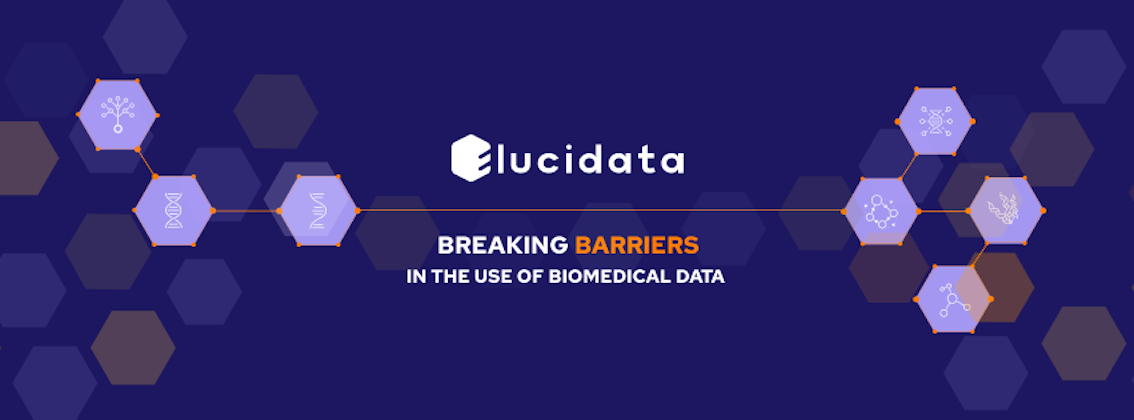

### Installations and Imports

In [1]:
pip install https://elucidatainc.github.io/PublicAssets/builds/polly-python/tests/testpolly/polly_python-3.2.0-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: polly-python
    Found existing installation: polly_python 3.0.0
    Uninstalling polly_python-3.0.0:
      Successfully uninstalled polly_python-3.0.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Imports

from polly.auth import Polly
from polly.polly_kg import PollyKG

import pandas as pd
import numpy as np
import sys
import io

import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Authentication

AUTH_KEY = "OWM1ZDJkY2ZlNDo6YjI1NTAzNGY1MGEzNDgyODBlMDBmNThiNTM1ZDM5ODRlODgzMTExNQ=="
Polly.auth(AUTH_KEY, env="testpolly")

In [4]:
#Connect to PollyKG

kg = PollyKG()

### PollyKG Summary

In [5]:
#Get graph summary

res1 = kg.get_graph_summary()#get graph summary
res1 = pd.json_normalize(res1)
res1

{'numNodes': 426515, 'numEdges': 16073381, 'numNodeLabels': 7, 'numEdgeLabels': 31, 'nodeLabels': ['Drug', 'Phenotype', 'Gene', 'Disease', 'Pathway', 'Go', 'Protein'], 'edgeLabels': ['is_a_phenotype', 'predisposes_towards_disease', 'disease_has_feature_disease', 'has_characteristic_disease', 'has_part_go', 'has_phenotype', 'targets', 'linked_to_pathway', 'happens_during_go', 'excluded_subClassOf_disease', 'part_of_go', 'mim2gene_medgen_disease', 'ends_during_go', 'is_a_pathway', 'positively_regulates_go', 'linked_to', 'part_of_progression_of_disease_disease', 'regulates_go', 'occurs_in_go', 'disease_arises_from_feature_disease', 'is_a_go', 'negatively_regulates_go', 'disease_has_major_feature_disease', 'encodes', 'interacts_with_gene', 'has_indication', 'intersection_of_disease', 'curated_content_resource_disease', 'disease_shares_features_of_disease', 'is_a_disease', 'interacts_with'], 'numNodeProperties': 42, 'numEdgeProperties': 37, 'nodeProperties': [{'description': 219818}, {'Locu

,numNodes,numEdges,numNodeLabels,numEdgeLabels,nodeLabels,edgeLabels,numNodeProperties,numEdgeProperties,nodeProperties,edgeProperties,totalNodePropertyValues,totalEdgePropertyValues
0,426515,16073381,7,31,"[Drug, Phenotype, Gene, Disease, Pathway, Go, ...","[is_a_phenotype, predisposes_towards_disease, ...",42,37,"[{'description': 219818}, {'LocusTag': 193500}...","[{'count': 13308802}, {'sourceDatabase': 13308...",3457283,52862924


In [6]:
#Node types

res1[['nodeLabels']].explode('nodeLabels')

,nodeLabels
0,Drug
0,Phenotype
0,Gene
0,Disease
0,Pathway
0,Go
0,Protein


In [7]:
#Edge Types

res1[['edgeLabels']].explode('edgeLabels')

,edgeLabels
0,is_a_phenotype
0,predisposes_towards_disease
0,disease_has_feature_disease
0,has_characteristic_disease
0,has_part_go
0,has_phenotype
0,targets
0,linked_to_pathway
0,happens_during_go
0,excluded_subClassOf_disease


In [8]:
kg.get_engine_status()

{'status': 'healthy', 'gremlin': {'version': 'tinkerpop-3.7.1'}, 'opencypher': {'version': 'Neptune-9.0.20190305-1.0'}}


{'status': 'healthy',
 'gremlin': {'version': 'tinkerpop-3.7.1'},
 'opencypher': {'version': 'Neptune-9.0.20190305-1.0'}}

### Querying  PollyKG

##### Two Query Languages Available
- Gremlin Query Language
- Cypher Query Language

In [9]:
#Find all Node Types  - Cypher

res2 = kg.run_opencypher_query("""MATCH (n)
                               RETURN labels(n) AS NodeType, count(n) AS NodeCount
                               ORDER BY NodeCount DESC;""")
pd.json_normalize(res2)

,NodeType,NodeCount
0,[Gene],193500
1,[Protein],109248
2,[Go],47995
3,[Disease],29967
4,[Pathway],22608
5,[Phenotype],19483
6,[Drug],3714


In [10]:
#Find all Node Types  - Gremlin

res2 = kg.run_gremlin_query("g.V().groupCount().by(label).order(local).by(values, desc)")

node = []
count = []
for i in range(0,len(res2['data']['@value'][0]['@value'])):
    if (i+1)%2 == 0:
        count.append(res2['data']['@value'][0]['@value'][i]['@value'])
    else:
        node.append(res2['data']['@value'][0]['@value'][i])
res2 = pd.DataFrame({'NodeType':node,'NodeCount':count})
res2

,NodeType,NodeCount
0,Gene,193500
1,Protein,109248
2,Go,47995
3,Disease,29967
4,Pathway,22608
5,Phenotype,19483
6,Drug,3714


In [11]:
#Find all Edge Types - Gremlin

res3 = kg.run_gremlin_query("""g.E().groupCount().by(label).order(local).by(values, desc)""")

edge = []
count = []
for i in range(0,len(res3['data']['@value'][0]['@value'])):
    if (i+1)%2 == 0:
        count.append(res3['data']['@value'][0]['@value'][i]['@value'])
    else:
        edge.append(res3['data']['@value'][0]['@value'][i])

res3 = pd.DataFrame({'EdgeType':edge,'EdgeCount':count})
res3        

,EdgeType,EdgeCount
0,interacts_with_gene,13308802
1,targets,1931724
2,linked_to,292852
3,encodes,105924
4,has_phenotype,102425
5,interacts_with,96833
6,linked_to_pathway,46818
7,is_a_go,40264
8,is_a_disease,39098
9,has_indication,36066


In [12]:
#Find the Node Types that an Edge Connects - Gremlin

res4 = kg.run_gremlin_query("""g.E().hasLabel('interacts_with')
                               .limit(10000)
                               .project('From_Node_Type', 'To_Node_Type')
                               .by(outV().label())  
                               .by(inV().label())  
                               .dedup()""")
res4

{'data': {'@type': 'g:List',
  '@value': [{'@type': 'g:Map',
    '@value': ['To_Node_Type', 'Protein', 'From_Node_Type', 'Protein']}]},
 'meta': {'@type': 'g:Map', '@value': []}}

In [13]:
#Properties of a Node - Gremlin

res5 = kg.run_gremlin_query("g.V().hasLabel('Gene').properties().key().dedup()")
res5

{'data': {'@type': 'g:List',
  '@value': ['EnsemblGeneID',
   'Symbol',
   'LocusTag',
   'Synonyms',
   'dbXrefs',
   'chromosome',
   'map_location',
   'description',
   'type_of_gene',
   'Symbol_from_nomenclature_authority',
   'Nomenclature_status',
   'Modification_date',
   'Feature_type',
   'tax_id']},
 'meta': {'@type': 'g:Map', '@value': []}}

In [14]:
#Properties of a Node - Cypher

res5 = kg.run_opencypher_query("""MATCH (n:Gene)
                               RETURN keys(n) AS properties
                               LIMIT 1;""")
res5

[{'properties': ['Symbol',
   'tax_id',
   'dbXrefs',
   'LocusTag',
   'Synonyms',
   'chromosome',
   'description',
   'Feature_type',
   'map_location',
   'type_of_gene',
   'EnsemblGeneID',
   'Modification_date',
   'Nomenclature_status',
   'Symbol_from_nomenclature_authority']}]

### Exploring ALPK1 gene

In [27]:
#Fetching all nodes and edges connected to ALPK1 Gene

res6 = kg.run_gremlin_query("""g.V().hasLabel('Gene').has('Symbol', 'ALPK1').as('gene')
                              .bothE().as('edge')
                              .otherV().as('connected_node')
                              .select('gene', 'edge', 'connected_node')
                              .by(valueMap(true))
                              .by(project('id', 'label', 'outV', 'inV')
                                  .by(id())
                                  .by(label())
                                  .by(outV().id())
                                  .by(inV().id()))
                              .by(valueMap(true))""")
# res6

In [17]:
#converting the output into a pandas dataframe 
#columns - node, edge, connected_node, direction

def get_node(node_info_list):
    """Takes output for individual node and extracts id, label and properties"""
    prop_dict = {}
    node_label = ""
    node_info_list = node_info_list[1]['@value']
    node_id = node_info_list[1]
    for i in node_info_list:
        if isinstance(i,dict):
            if i['@value'] == 'label':
                idx = node_info_list.index(i)
                node_label = node_info_list[idx+1]
                for i in range(idx+2,len(node_info_list)-1,2):
                    prop_dict[node_info_list[i]] = node_info_list[i+1]['@value']
                break
    return node_id, node_label, prop_dict
        
def get_edge(edge_info_list):
    """Takes output for individual edges and label, from and to node"""
    edge_info_list = edge_info_list[1]['@value']
    label_idx = edge_info_list.index('label')
    label = edge_info_list[label_idx+1]
    out_idx = edge_info_list.index('outV')
    in_idx = edge_info_list.index('inV')
    from_node = edge_info_list[out_idx + 1]
    to_node = edge_info_list[in_idx + 1]
    return label, from_node, to_node

def convert_graphson2df(graphson):
    """Uses get_node and get_edge functions to convert output to dataframe"""
    df = pd.DataFrame([])
    for i in graphson:
    
        node_idx = i['@value'].index('gene')
        edge_idx = i['@value'].index('edge')
        conn_node_idx = i['@value'].index('connected_node')

        node = i['@value'][node_idx:edge_idx]
        edge = i['@value'][edge_idx:conn_node_idx]
        conn_node = i['@value'][conn_node_idx:]
        
        node_id, node_label, node_prop_dict = get_node(node)
        edge_label, from_node, to_node = get_edge(edge)
        conn_node_id, conn_node_label, conn_node_prop_dict = get_node(conn_node)
        
        name_keys = ['name','Symbol','description','gene_id']
        node_name_keys = set(name_keys).intersection(set(node_prop_dict.keys()))
        node_name_key = 'Symbol' if 'Symbol' in list(node_name_keys) else list(node_name_keys)[-1]
        conn_node_name_keys = set(name_keys).intersection(set(conn_node_prop_dict.keys()))
        conn_node_name_key = 'Symbol' if 'Symbol' in list(conn_node_name_keys) else list(conn_node_name_keys)[-1]
        
        if from_node == node_id:
            from_node = node_prop_dict[node_name_key]
        elif from_node == conn_node_id:
            from_node = conn_node_prop_dict[conn_node_name_key]
            
        if to_node == node_id:
            to_node = node_prop_dict[node_name_key]
        elif to_node == conn_node_id:
            to_node = conn_node_prop_dict[conn_node_name_key]
        
        
        new_row = pd.DataFrame({'node1_id':node_id,'node1_label': node_label,
                                'node1_name':node_prop_dict[node_name_key], 'node1_properties': [node_prop_dict],
                                'node2_id':conn_node_id, 'node2_label': conn_node_label, 
                                'node2_name':conn_node_prop_dict[conn_node_name_key], 
                                'node2_properties': [conn_node_prop_dict],
                                'edge_label': edge_label, 'edge_from': from_node, 'edge_to': to_node })
        
        df = pd.concat([df, new_row], ignore_index=True)
    df.reset_index(drop=True, inplace=True)
    
    return df

In [18]:
df_out6 = convert_graphson2df(res6['data']['@value'])

In [19]:
df_out6.head()

,node1_id,node1_label,node1_name,node1_properties,node2_id,node2_label,node2_name,node2_properties,edge_label,edge_from,edge_to
0,80216,Gene,ALPK1,"{'EnsemblGeneID': ['ENSG00000073331'], 'Symbol...",GO:0006338,Go,chromatin remodeling,"{'name': ['chromatin remodeling'], 'synonym': ...",linked_to,ALPK1,chromatin remodeling
1,80216,Gene,ALPK1,"{'EnsemblGeneID': ['ENSG00000073331'], 'Symbol...",GO:0006468,Go,protein phosphorylation,"{'name': ['protein phosphorylation'], 'synonym...",linked_to,ALPK1,protein phosphorylation
2,80216,Gene,ALPK1,"{'EnsemblGeneID': ['ENSG00000073331'], 'Symbol...",GO:0000922,Go,spindle pole,"{'name': ['spindle pole'], 'alt_id': ['GO:0030...",linked_to,ALPK1,spindle pole
3,80216,Gene,ALPK1,"{'EnsemblGeneID': ['ENSG00000073331'], 'Symbol...",GO:0002753,Go,cytoplasmic pattern recognition receptor signa...,{'name': ['cytoplasmic pattern recognition rec...,linked_to,ALPK1,cytoplasmic pattern recognition receptor signa...
4,80216,Gene,ALPK1,"{'EnsemblGeneID': ['ENSG00000073331'], 'Symbol...",GO:0004674,Go,protein serine/threonine kinase activity,{'name': ['protein serine/threonine kinase act...,linked_to,ALPK1,protein serine/threonine kinase activity


In [20]:
cy_res6 = kg.run_opencypher_query("""MATCH (g:Gene {Symbol: 'ALPK1'})-[r]-(n) 
                                     RETURN g.Symbol AS node1_name,
                                     id(g) AS node1_id,
                                     labels(g) AS node1_label,
                                     id(startNode(r)) AS edge_from,
                                     id(endNode(r)) AS edge_to,
                                     type(r) AS edge_label, 
                                     COALESCE(n.Symbol, n.name, n.description, n.gene_id) AS node2_name,
                                     id(n) AS node2_id,
                                     labels(n) AS node2_label;""")
df_out6_cy = pd.json_normalize(cy_res6)
df_out6_cy = df_out6_cy.explode('node1_label')
df_out6_cy = df_out6_cy.explode('node2_label')

#rename edge_from and edge_to
df_out6_cy.loc[df_out6_cy['edge_from'] == '80216','edge_from'] = 'ALPK1'
df_out6_cy.loc[df_out6_cy['edge_from'] != 'ALPK1','edge_from'] = df_out6_cy[df_out6_cy['edge_from'] != 'ALPK1']['node2_name']
df_out6_cy.loc[df_out6_cy['edge_to'] == '80216','edge_to'] = 'ALPK1'
df_out6_cy.loc[df_out6_cy['edge_to'] != 'ALPK1','edge_to'] = df_out6_cy[df_out6_cy['edge_to'] != 'ALPK1']['node2_name']

df_out6_cy.head()

,node1_name,node1_id,node1_label,edge_from,edge_to,edge_label,node2_name,node2_id,node2_label
0,ALPK1,80216,Gene,NOD1,ALPK1,interacts_with_gene,NOD1,10392,Gene
1,ALPK1,80216,Gene,ACOD1,ALPK1,interacts_with_gene,ACOD1,730249,Gene
2,ALPK1,80216,Gene,CALML5,ALPK1,interacts_with_gene,CALML5,51806,Gene
3,ALPK1,80216,Gene,S100A8,ALPK1,interacts_with_gene,S100A8,6279,Gene
4,ALPK1,80216,Gene,BNC2,ALPK1,interacts_with_gene,BNC2,54796,Gene


### Visualization Using Networkx

In [21]:
def generate_networkx_visual(node_types,df,title):
    # Assign unique colors for each node type
    unique_types = set(node_types.values())
    color_map = {node_type: color for node_type, color in zip(unique_types, ['yellow', 'lightblue', 'lightgreen', 'pink', 'orange'])}

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with attributes
    for node, node_type in node_types.items():
        G.add_node(node, type=node_type)

    # Add edges
    for _, row in df.iterrows():
        G.add_edge(row['edge_from'], row['edge_to'], label=row['edge_label'])

    # Assign colors based on node type
    node_colors = [color_map[node_types[n]] for n in G.nodes]

    # Draw the graph
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G)  # Layout for visualization

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, edge_color="gray", font_size=8)
    
    print('No. of Nodes Connected to ALPK1:',G.number_of_nodes()-1)

    # Draw edge labels
    edge_labels = {(row['edge_from'], row['edge_to']): row['edge_label'] for _, row in df.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Create legend
    import matplotlib.patches as mpatches
    legend_patches = [mpatches.Patch(color=color, label=node_type) for node_type, color in color_map.items()]
    plt.legend(handles=legend_patches, title="Node Types", loc="best")

    plt.title(title)
    plt.show()

No. of Nodes Connected to ALPK1: 56


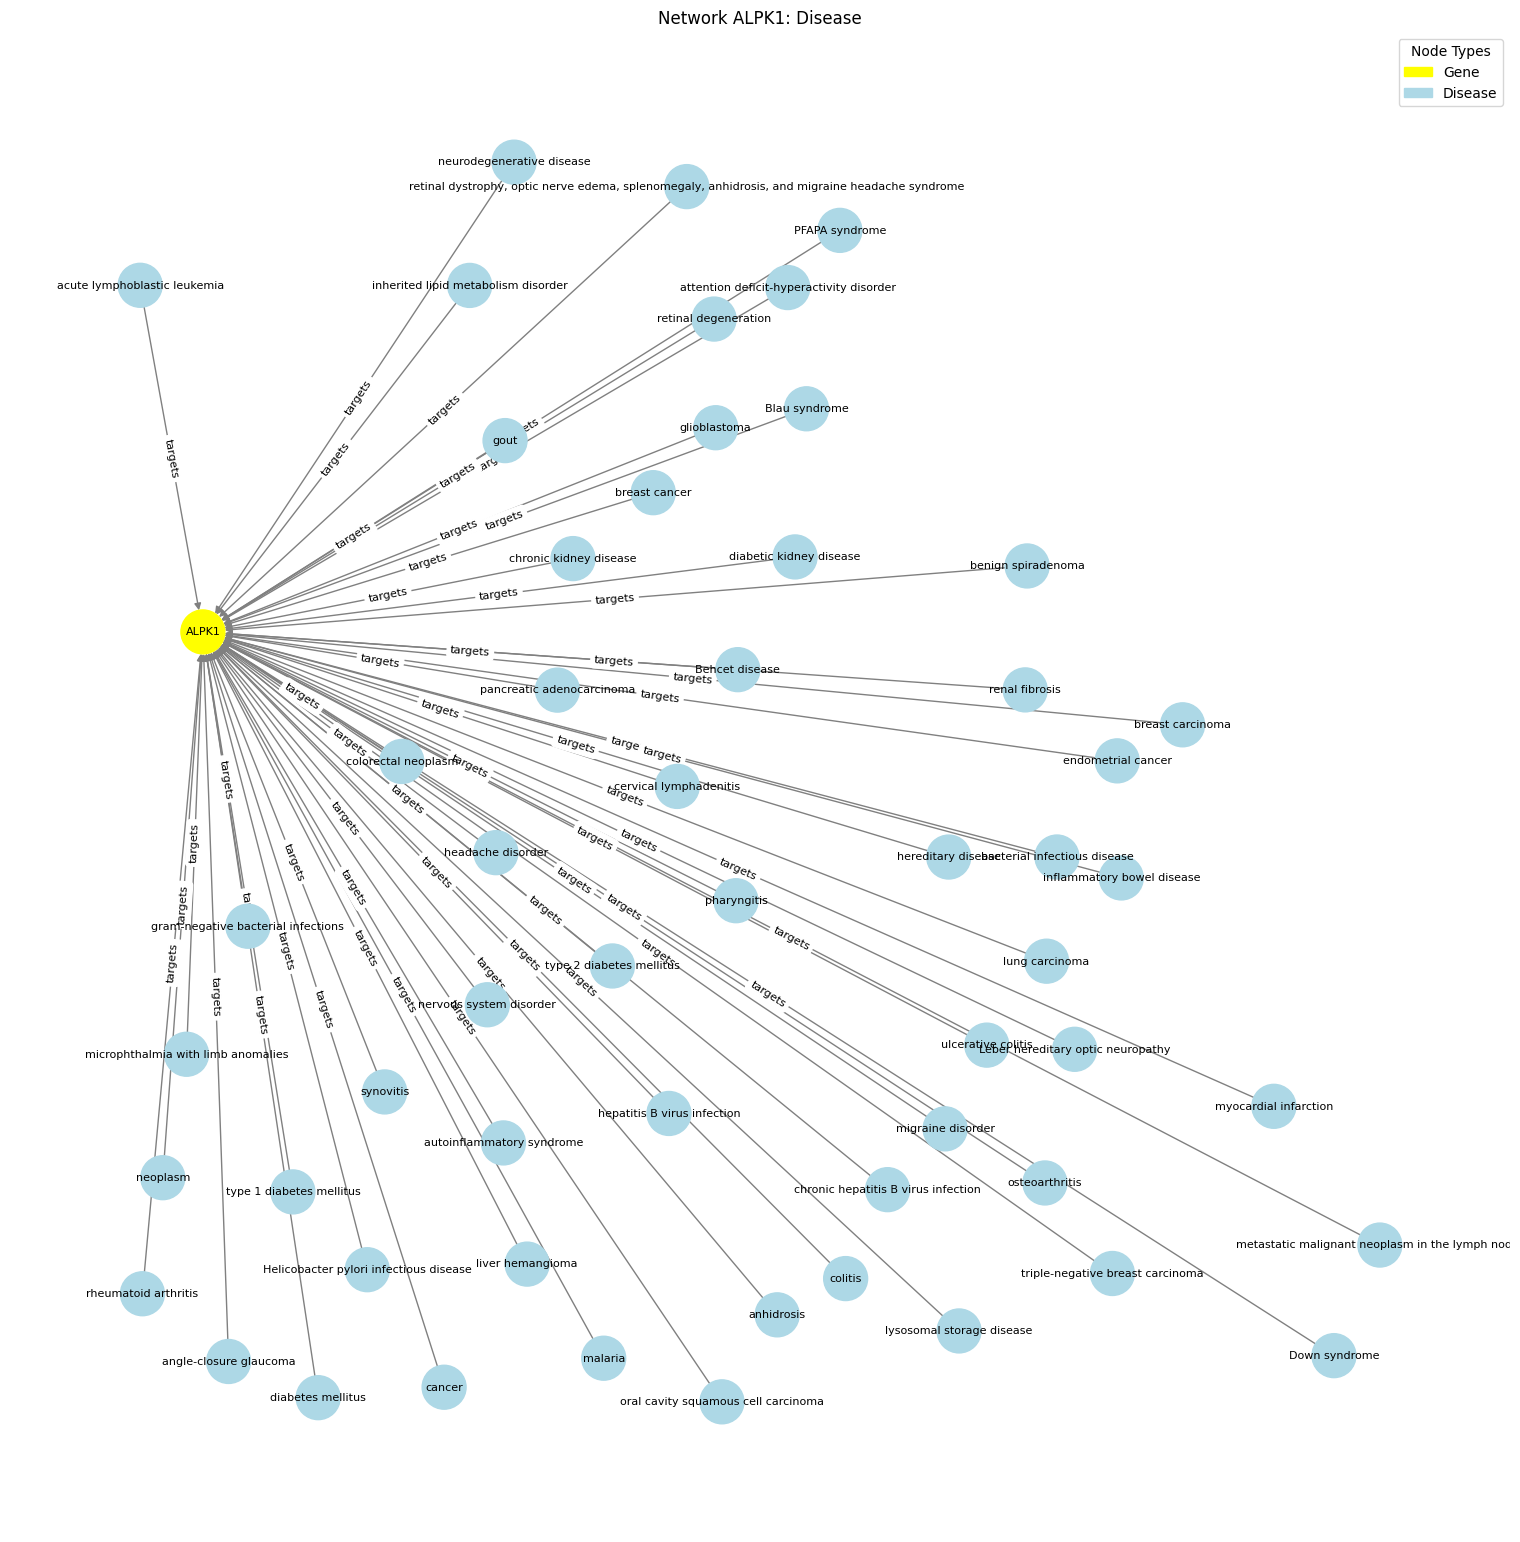

In [22]:
df = df_out6[df_out6['node2_label'] == 'Disease'][['edge_from',
                                                   'edge_to',
                                                   'edge_label']].drop_duplicates(keep='first')
node_types = dict(df_out6[df_out6['node2_label'] == 'Disease'][['node2_name','node2_label']].drop_duplicates(keep='first').values) | dict(df_out6[df_out6['node2_label'] == 'Disease'][['node1_name','node1_label']].drop_duplicates(keep='first').values)
generate_networkx_visual(node_types,df,"Network ALPK1: Disease")

No. of Nodes Connected to ALPK1: 2


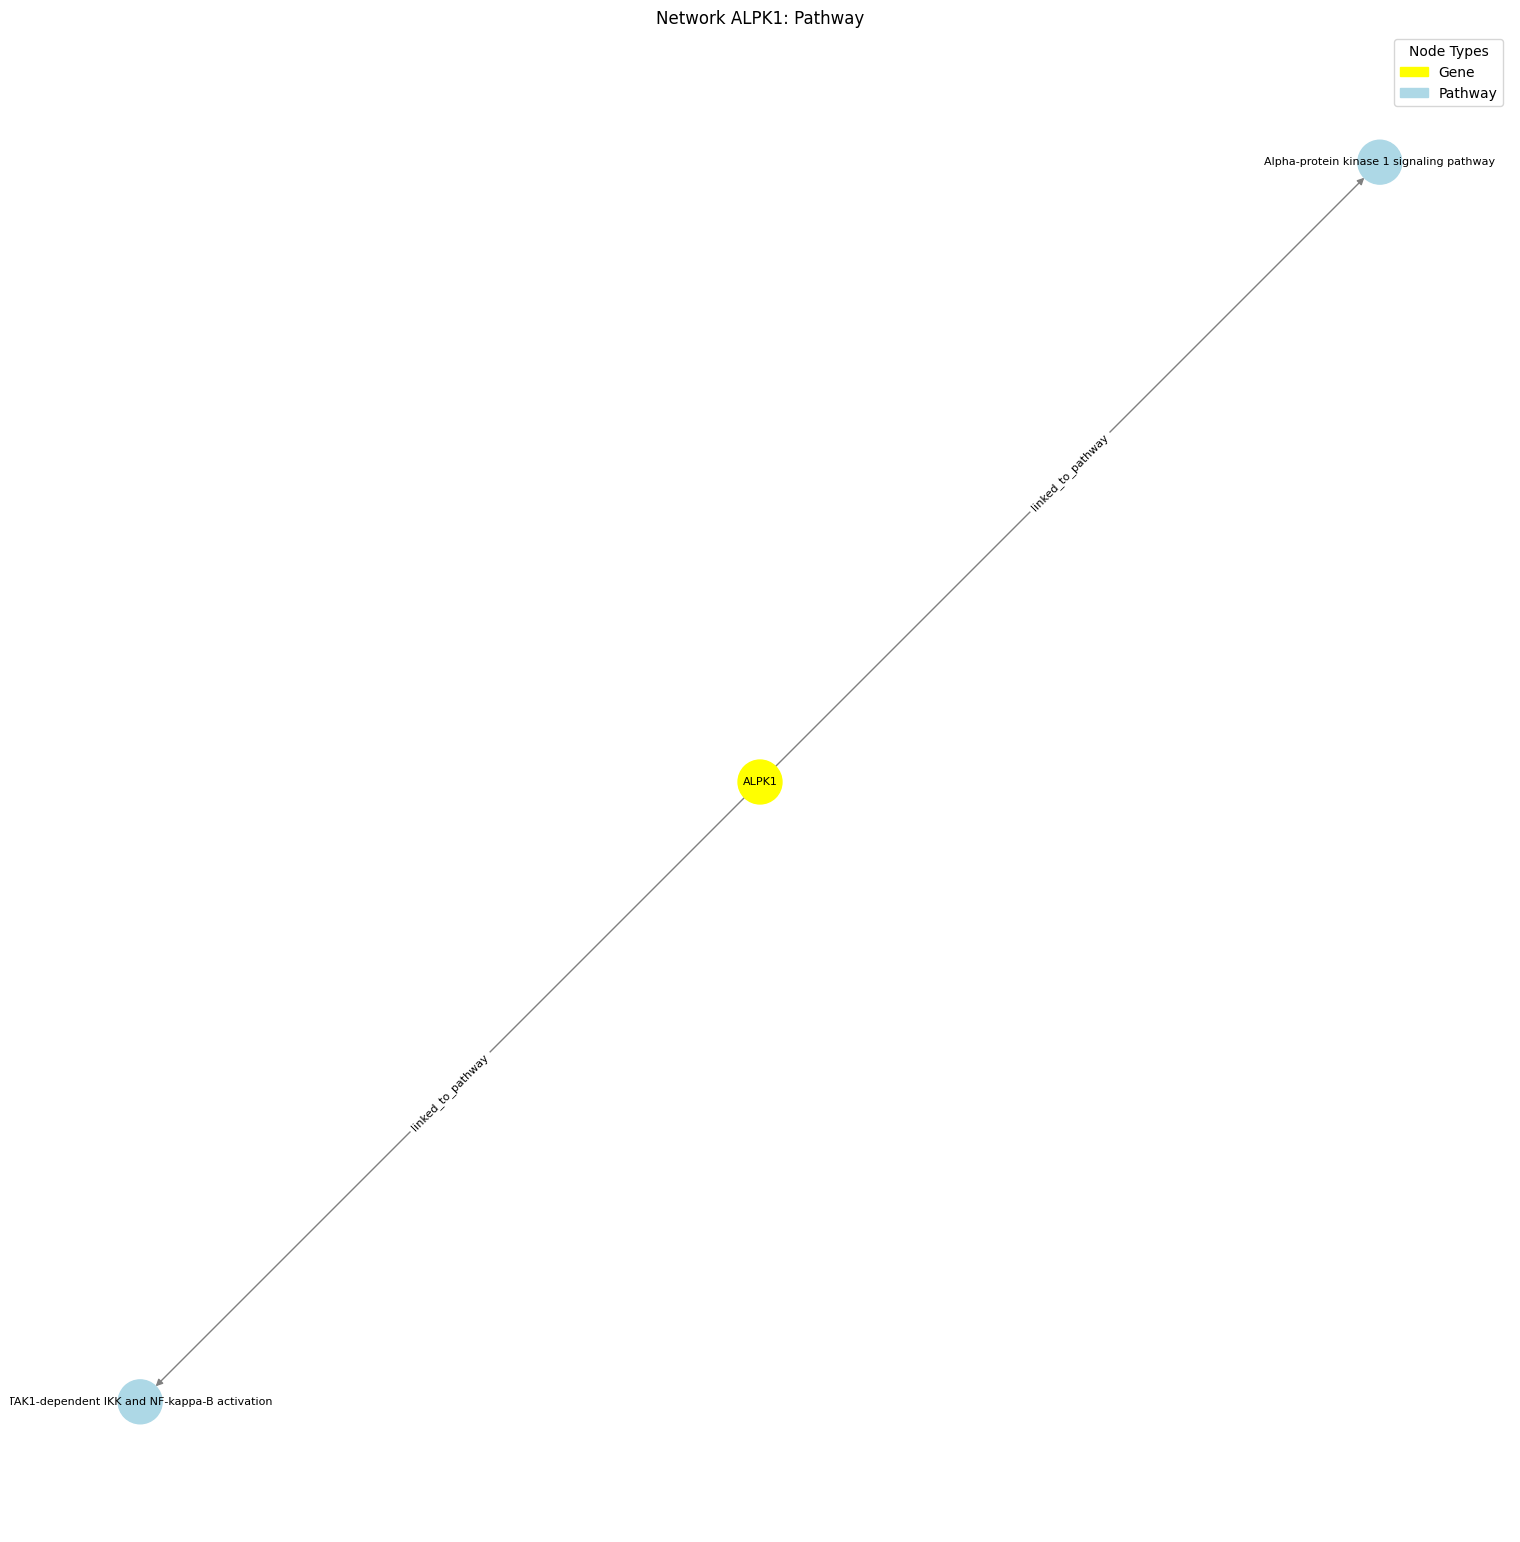

In [23]:
df = df_out6[df_out6['node2_label'] == 'Pathway'][['edge_from',
                                                   'edge_to',
                                                   'edge_label']].drop_duplicates(keep='first')
node_types = dict(df_out6[df_out6['node2_label'] == 'Pathway'][['node2_name','node2_label']].drop_duplicates(keep='first').values) | dict(df_out6[df_out6['node2_label'] == 'Pathway'][['node1_name','node1_label']].drop_duplicates(keep='first').values)
generate_networkx_visual(node_types,df,"Network ALPK1: Pathway")

No. of Nodes Connected to ALPK1: 1


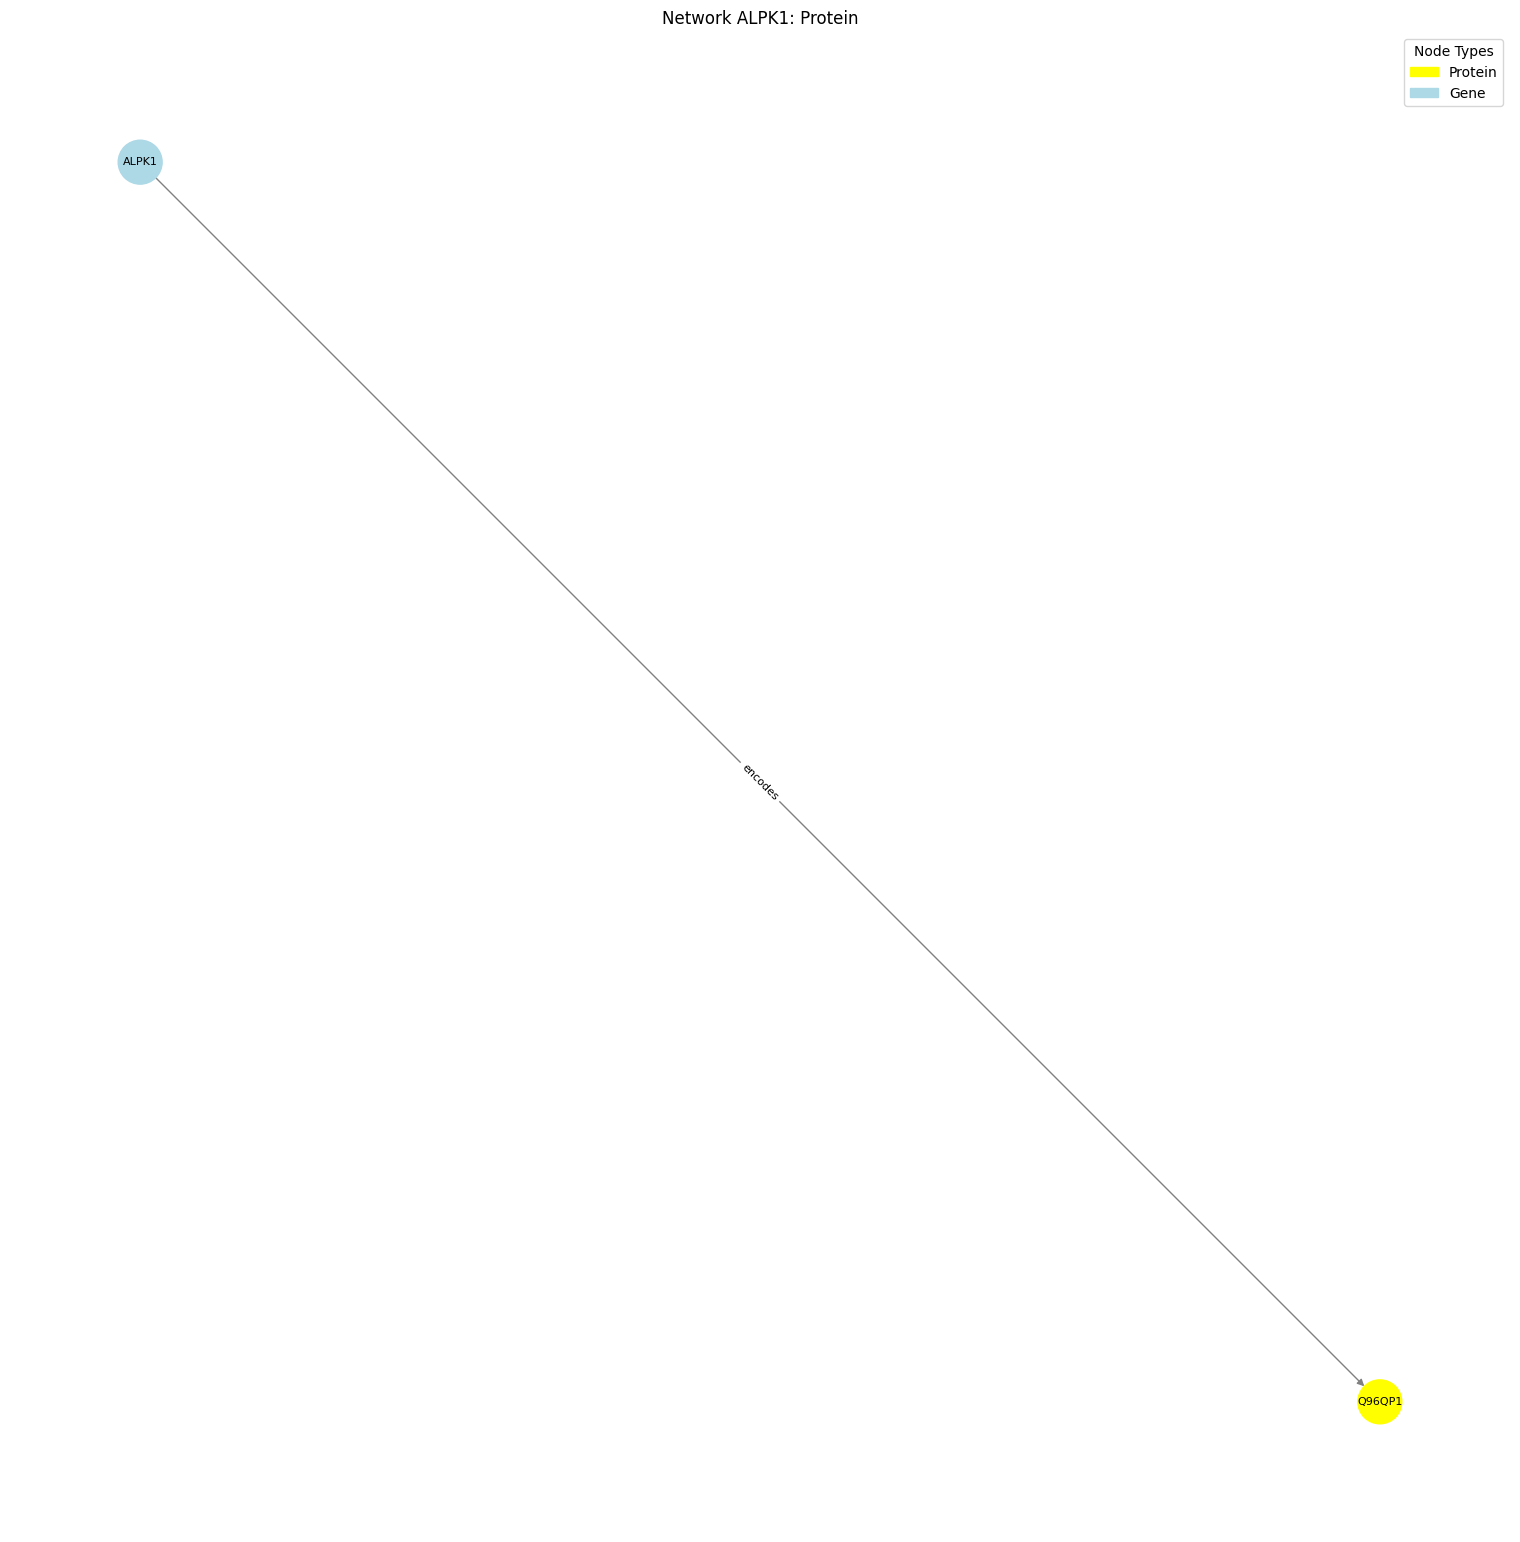

In [24]:
df = df_out6[df_out6['node2_label'] == 'Protein'][['edge_from',
                                                   'edge_to',
                                                   'edge_label']].drop_duplicates(keep='first')
node_types = dict(df_out6[df_out6['node2_label'] == 'Protein'][['node2_name','node2_label']].drop_duplicates(keep='first').values) | dict(df_out6[df_out6['node2_label'] == 'Protein'][['node1_name','node1_label']].drop_duplicates(keep='first').values)
generate_networkx_visual(node_types,df,"Network ALPK1: Protein")

No. of Nodes Connected to ALPK1: 16


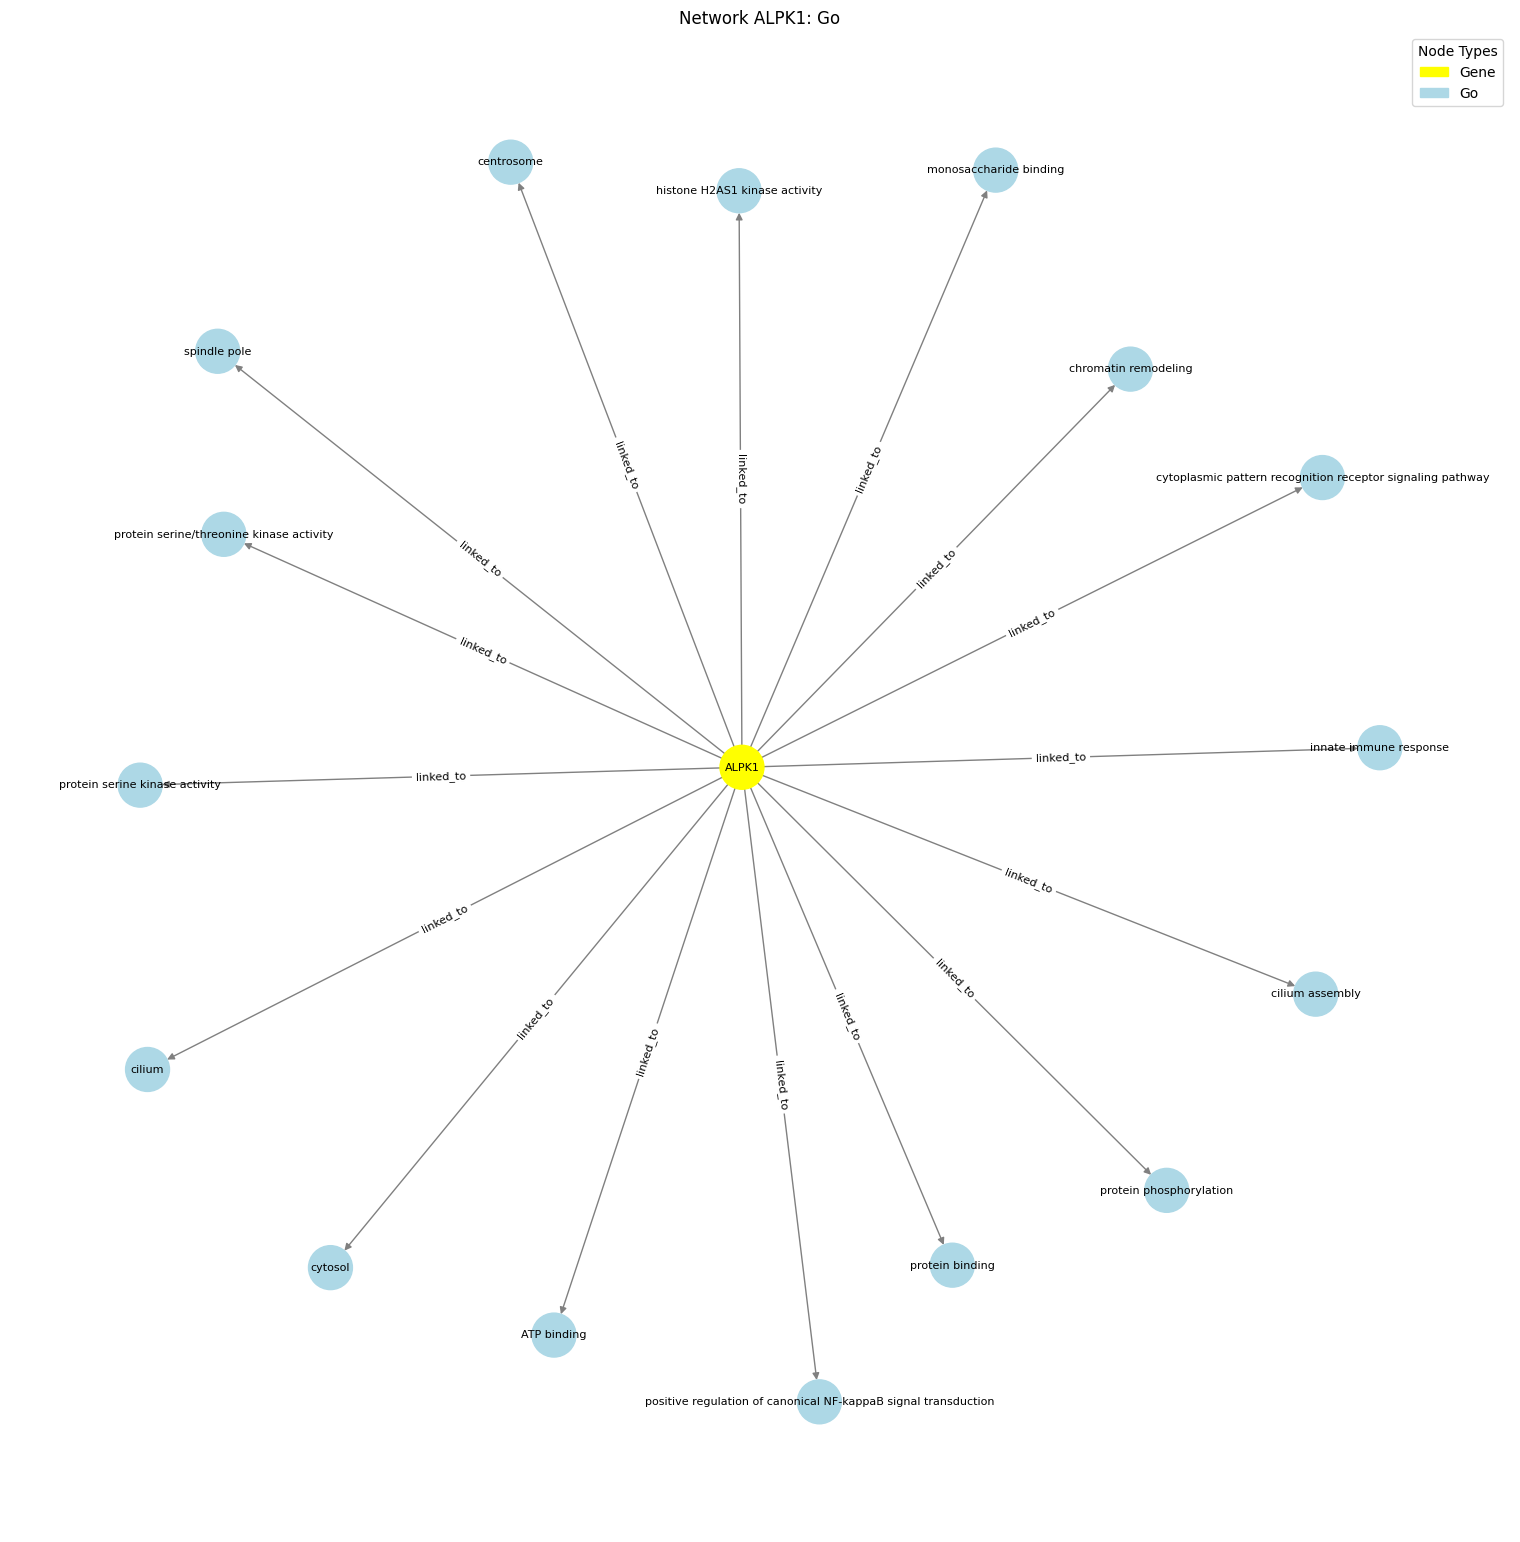

In [25]:
df = df_out6[df_out6['node2_label'] == 'Go'][['edge_from',
                                                   'edge_to',
                                                   'edge_label']].drop_duplicates(keep='first')
node_types = dict(df_out6[df_out6['node2_label'] == 'Go'][['node2_name','node2_label']].drop_duplicates(keep='first').values) | dict(df_out6[df_out6['node2_label'] == 'Go'][['node1_name','node1_label']].drop_duplicates(keep='first').values)
generate_networkx_visual(node_types,df,"Network ALPK1: Go")

No. of Nodes Connected to ALPK1: 202


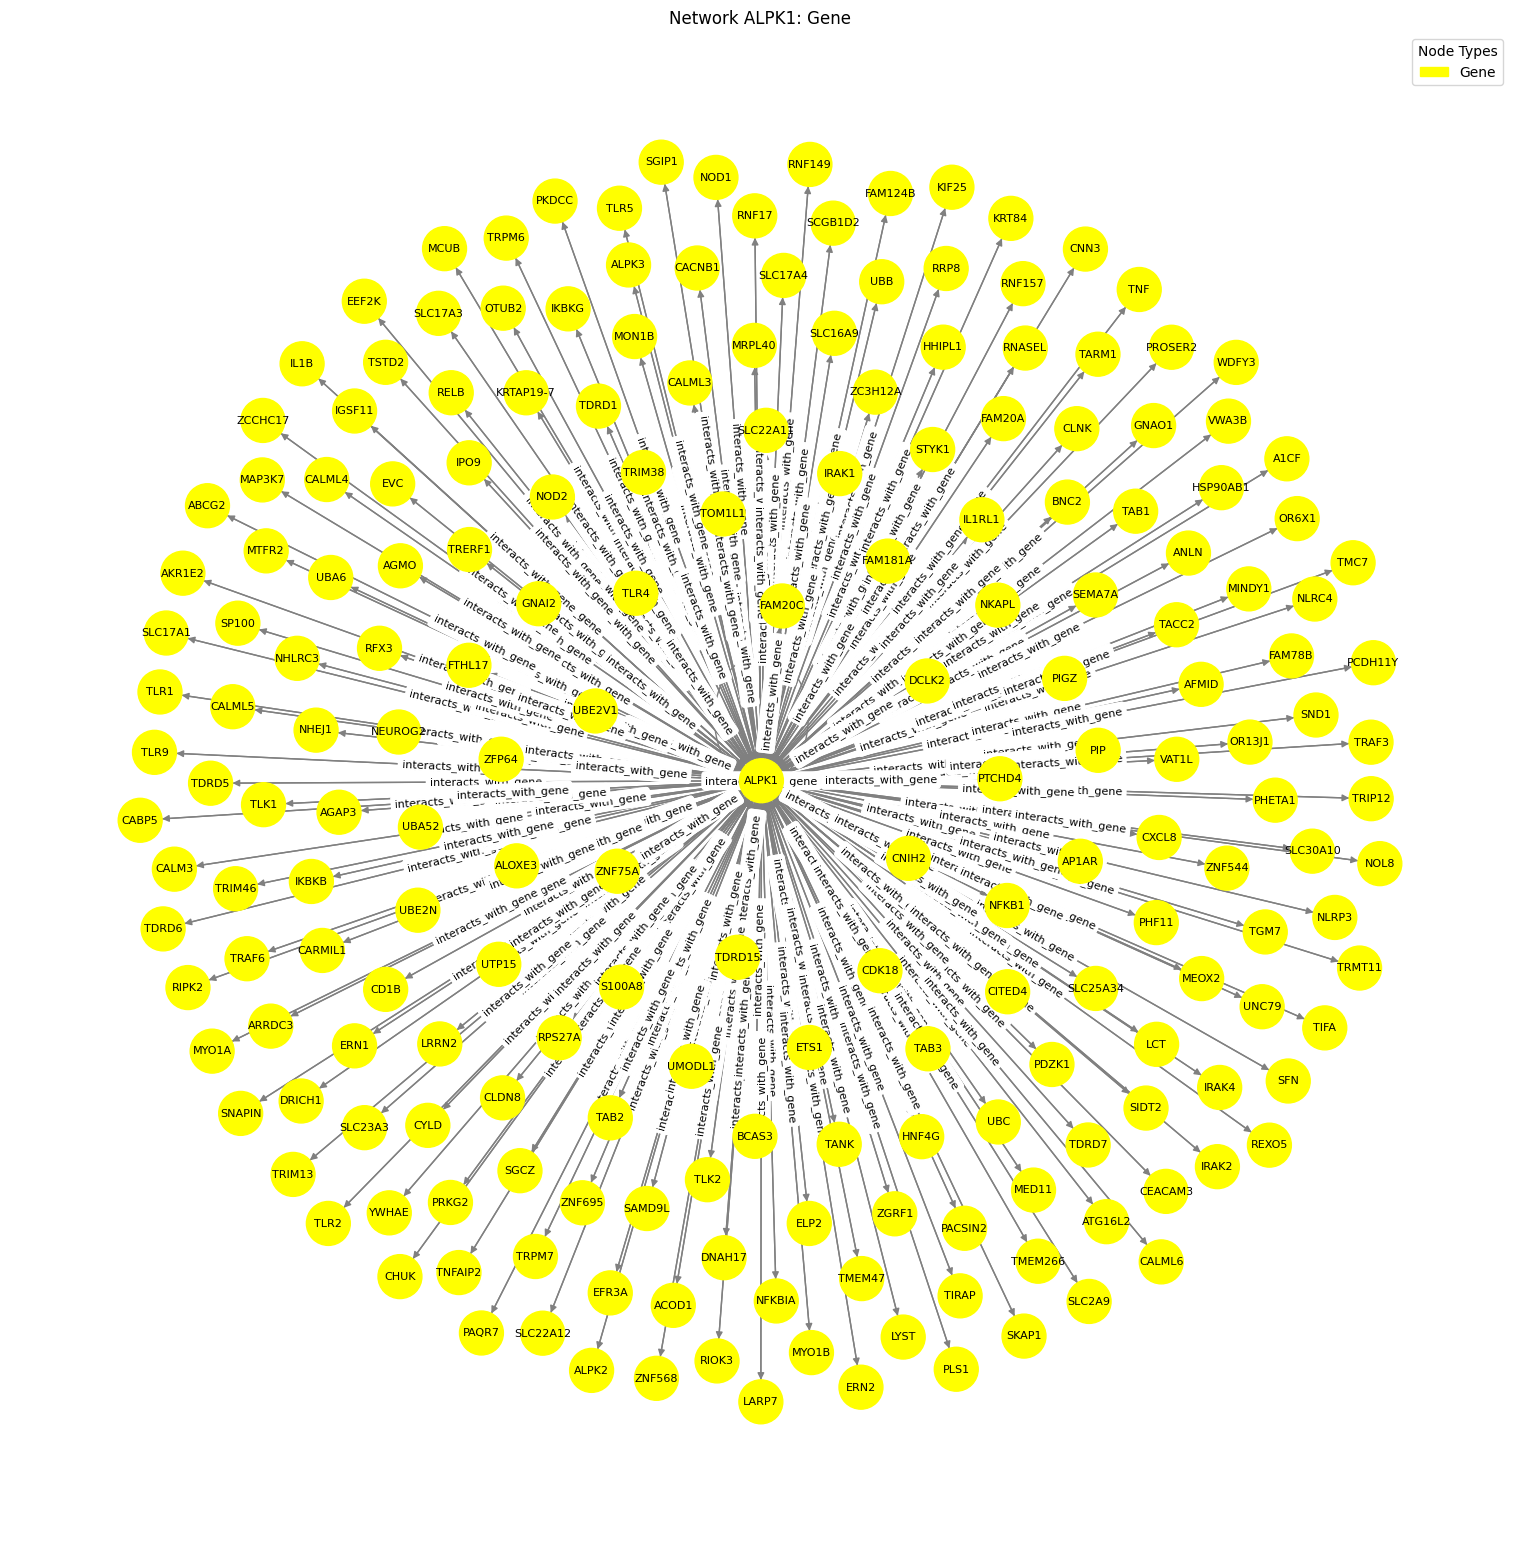

In [26]:
df = df_out6[df_out6['node2_label'] == 'Gene'][['edge_from',
                                                   'edge_to',
                                                   'edge_label']].drop_duplicates(keep='first')
node_types = dict(df_out6[df_out6['node2_label'] == 'Gene'][['node2_name','node2_label']].drop_duplicates(keep='first').values) | dict(df_out6[df_out6['node2_label'] == 'Gene'][['node1_name','node1_label']].drop_duplicates(keep='first').values)
generate_networkx_visual(node_types,df,"Network ALPK1: Gene")

No. of Nodes Connected to ALPK1: 236


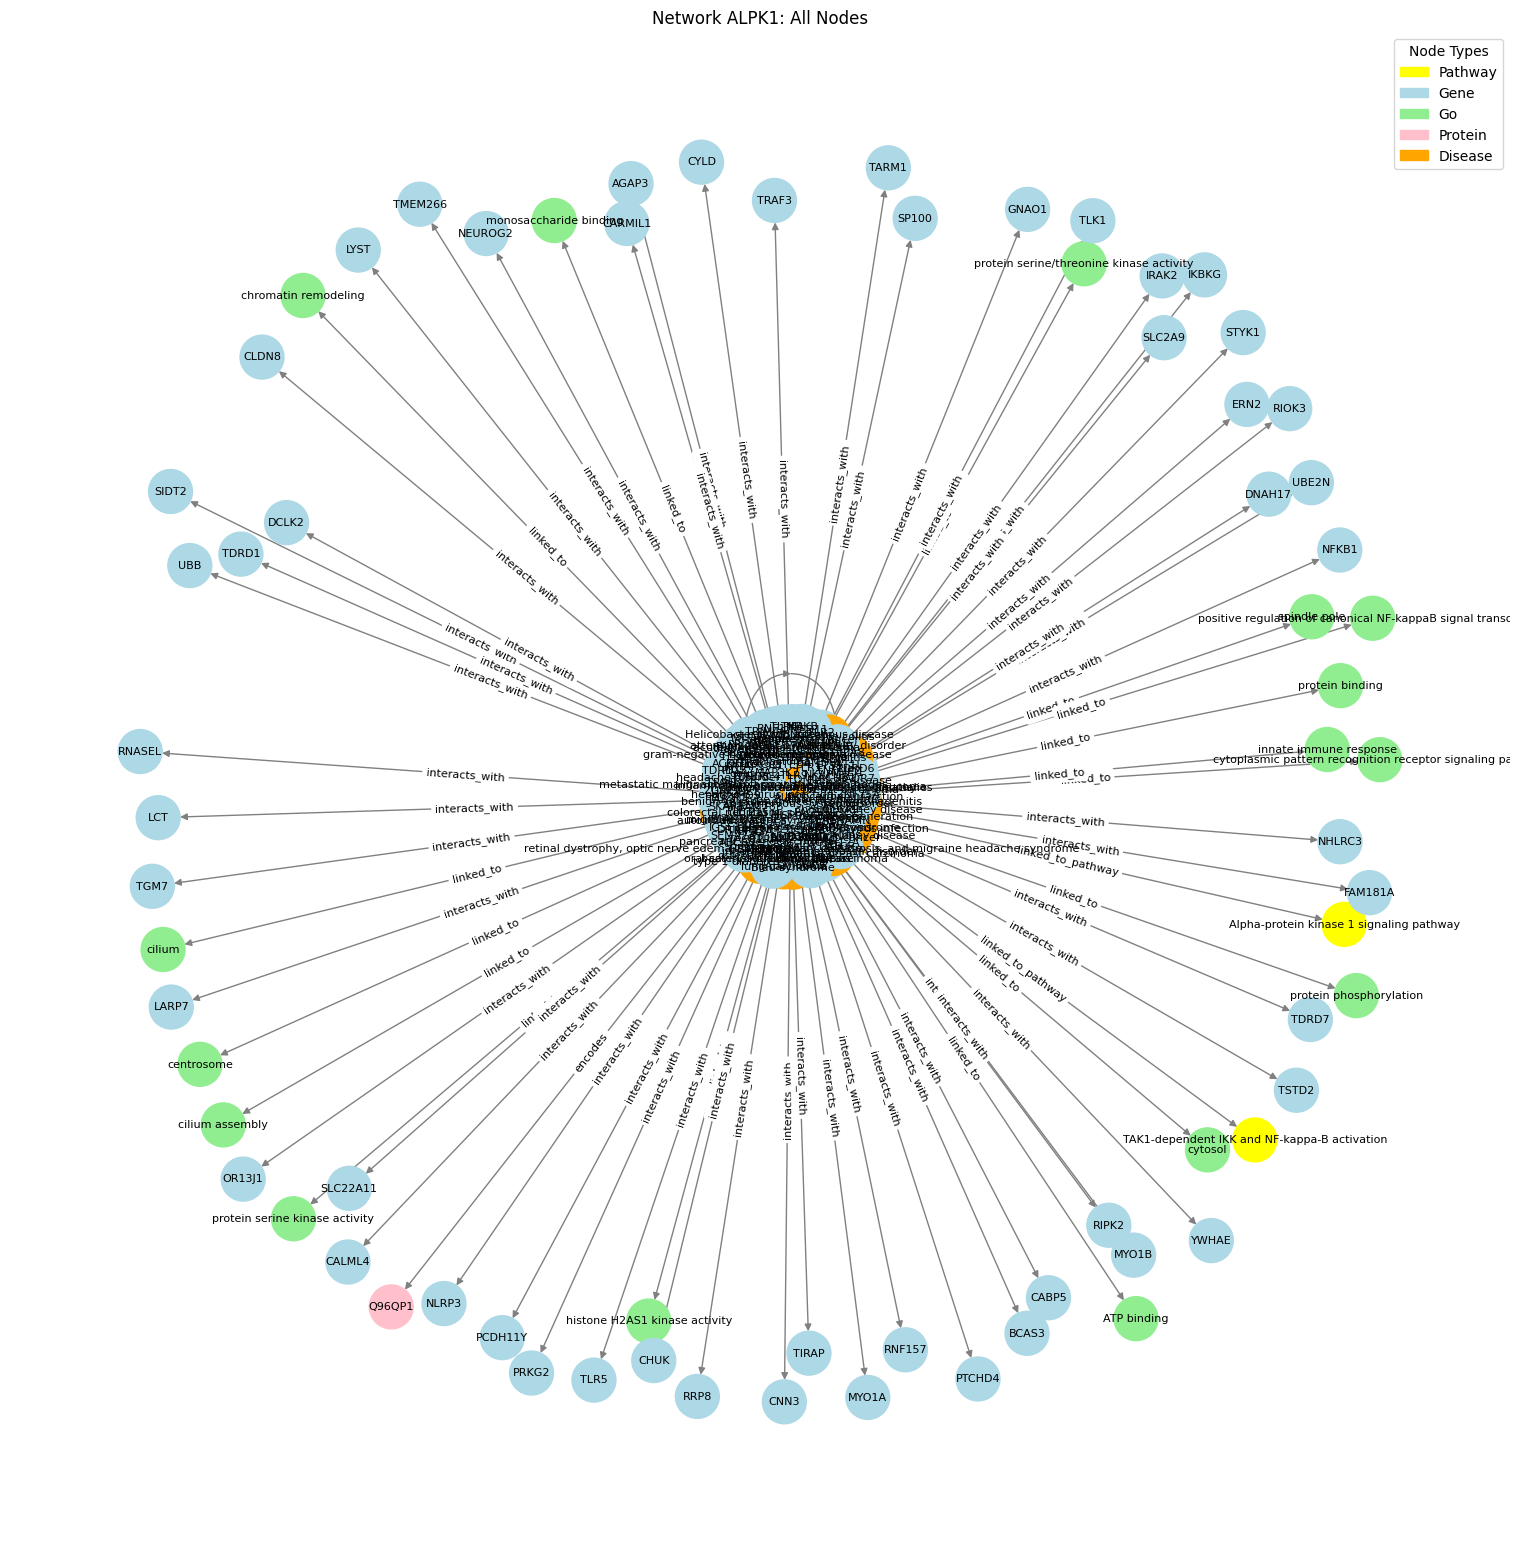

In [31]:
node_types = dict(df_out6[['node2_name','node2_label']].drop_duplicates(keep='first').values) | dict(df_out6[['node1_name','node1_label']].drop_duplicates(keep='first').values)
df = df_out6[['edge_from','edge_to','edge_label']].drop_duplicates(keep='first')
generate_networkx_visual(node_types,df,"Network ALPK1: All Nodes")